In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def Find_Optimal_Cutoff(tpr, fpr, threshold):
    y = tpr - fpr
    youden_index = np.argmax(y)  # Only the first occurrence is returned.
    # print(Youden_index)
    optimal_threshold = threshold[youden_index]
    point = [fpr[youden_index], tpr[youden_index]]
    return optimal_threshold, point


In [2]:
df = pd.read_csv("mutil_pos_label.csv" )
y_label= df.true_class_value
y_pre = df.pre_class_value

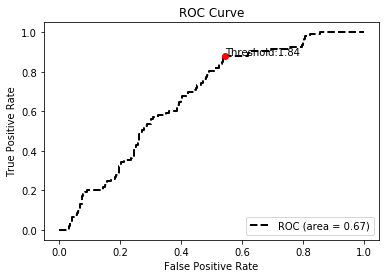

In [3]:
fpr, tpr, thresholds = roc_curve(y_label, y_pre, pos_label=3)
# for i, value in enumerate(thersholds)
#     print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)

optimal_th, optimal_point = Find_Optimal_Cutoff(tpr, fpr, threshold=thresholds)
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2) 
plt.xlim([-0.05, 1.05])  # 設置x、y軸的上下限，避免邊缘重合
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [4]:
# 多個pos_label畫ROC圖
def multi_pos_labels_roc(names, pos_labels, colors, X_test, y_test, save=True, dpin=100):
      """    
      Args:
          names: list, 種類名稱
          pos_labels: list, pos_label的清單
          save: 最後是否儲存圖片
          
      Returns:
          回傳圖片plt
      """
      def Find_Optimal_Cutoff(tpr, fpr, threshold):
        y = tpr - fpr
        youden_index = np.argmax(y)  # Only the first occurrence is returned.
        optimal_threshold = threshold[youden_index]
        point = [fpr[youden_index], tpr[youden_index]]
        return optimal_threshold, point
      
      
      plt.figure(figsize=(8, 8), dpi=dpin)

      for (name, pos_labels, colorname) in zip(names, pos_labels, colors):
          
        # y_test_preds = method.predict(X_test)
        # y_test_predprob = method.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_label, y_pre, pos_label= pos_labels)
        optimal_th, optimal_point = Find_Optimal_Cutoff(tpr, fpr, threshold=thresholds)
        plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
        plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
        
        plt.plot(fpr, tpr, lw=2, label='{} threshold={:.3f} (AUC={:.3f})'.format(name, optimal_th ,auc(fpr, tpr)),color = colorname)
        plt.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
        plt.axis('square')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate',fontsize=15)
        plt.ylabel('True Positive Rate',fontsize=15)
        plt.title('ROC Curve',fontsize=15)
        plt.legend(loc='lower right',fontsize=10)

      if save:
        plt.savefig('multi_models_roc.png')
          
      return plt


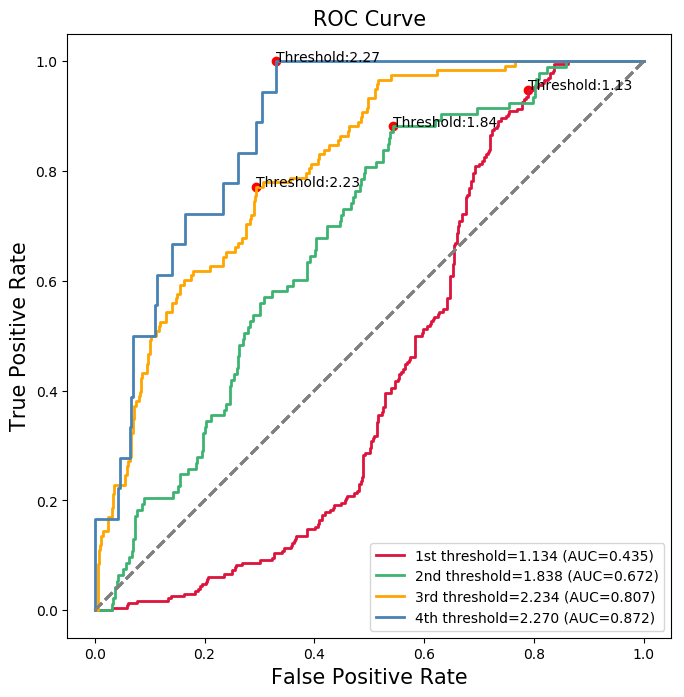

In [5]:
names = ['1st','2nd','3rd','4th']

pos_labels = [2,3,4,5]


colors = ['crimson',
          'mediumseagreen',
          'orange',
          'steelblue'
         ]

#ROC curves
roc_graph = multi_pos_labels_roc(names, pos_labels, colors, y_label, y_pre, save = False)
# roc_graph.savefig('save_ROC.png')
